# EDA on Retail Sales Data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
retail_data = pd.read_csv(r"C:\Users\HP\Documents\retail_sales_dataset.csv")
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Exploring and cleaning data

In [13]:
retail_data.shape

(1000, 9)

In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   age_group         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [59]:
retail_data.duplicated().sum()

np.int64(0)

In [60]:
retail_data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
age_group              3
Year                   2
dtype: int64

In [19]:
retail_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


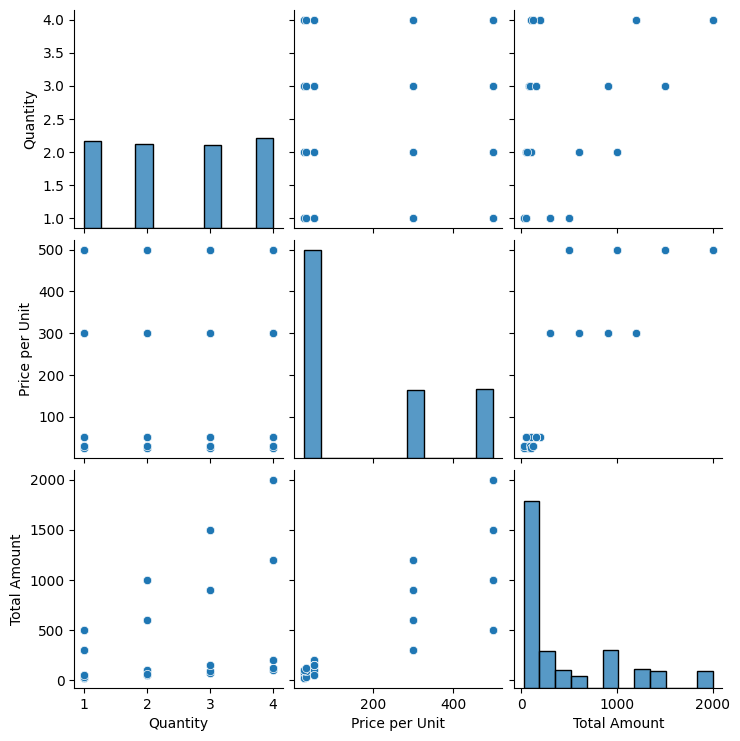

In [4]:
retail_data["Transaction ID"] = retail_data["Transaction ID"].astype(str) 
retail_data["Age"] = retail_data["Age"].astype(str) 

sns.pairplot(retail_data)
plt.show()

# Customer Analysis

In [5]:
# count of gender
gn = retail_data["Gender"].value_counts()
gn

Gender
Female    510
Male      490
Name: count, dtype: int64

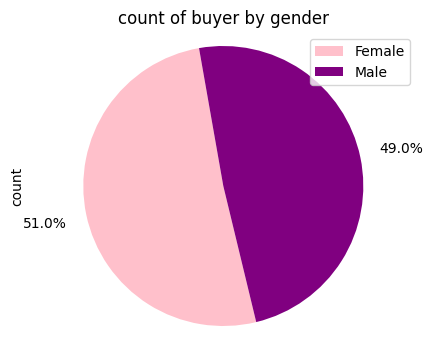

In [37]:
exp = [0,0]
color = ["pink", "purple"]
gn.plot(kind= "pie", figsize = (5,4), autopct = "%1.1f%%", shadow = False, startangle = 100, 
         explode = exp, labels = None, pctdistance = 1.3, colors = color)

  

plt.title("count of buyer by gender")
plt.axis("equal")
plt.legend(labels = gn.index)
plt.show()         
         

         

In [19]:
# sales contribution by gender
sales = retail_data.groupby("Gender")["Total Amount"].sum()
sales

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

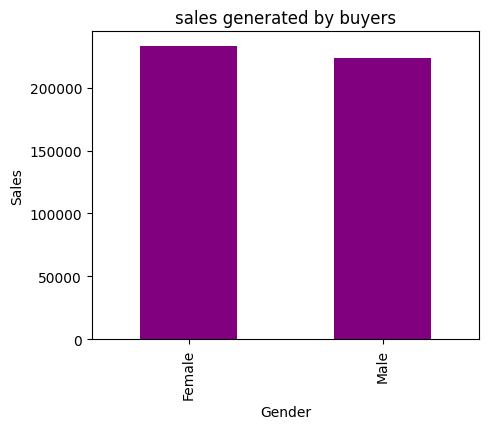

In [20]:
sales.plot(kind = "bar", figsize = (5,4), color = "purple")
plt.title("sales generated by buyers")
plt.ylabel("Sales")
plt.show()

In [21]:
# creating a age group column
age_group = []
for row in retail_data["Age"]:
    if row<"30":
       age_group.append("<30 group")
    elif row>"45":
        age_group.append(">45 group")
    else:
        age_group.append("30-45 group") 
retail_data["age_group"] = age_group
retail_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,30-45 group
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,<30 group
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,>45 group
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,30-45 group
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,30-45 group
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,>45 group
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,>45 group
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,<30 group
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,30-45 group


In [22]:
# count of buyer by age group
agec = retail_data["age_group"].value_counts()
agec

age_group
>45 group      424
30-45 group    325
<30 group      251
Name: count, dtype: int64

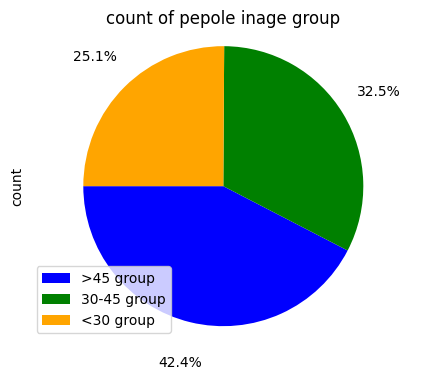

In [89]:
exp = [0,0,0]
color = ["blue", "green", "orange"]
agec.plot(kind= "pie", figsize = (5,4), autopct = "%1.1f%%", shadow = False, startangle = 180, 
         explode = exp, labels = None, pctdistance = 1.3, colors = color)

  

plt.title("count of pepole in age group")
plt.axis("equal")
plt.legend(labels = agec.index)
plt.show()  

In [23]:
# sales contribution by age group
age_sales = retail_data.groupby("age_group")["Total Amount"].sum()
age_sales

age_group
30-45 group    151745
<30 group      123155
>45 group      181100
Name: Total Amount, dtype: int64

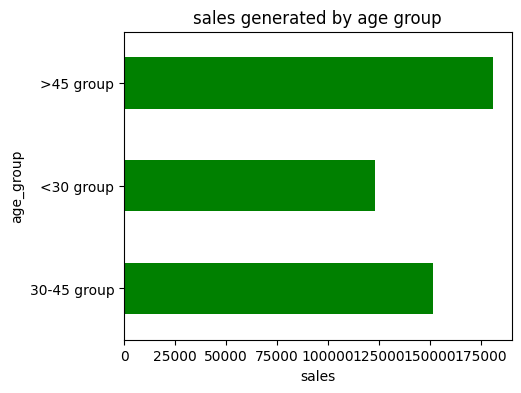

In [24]:
age_sales.plot(kind = "barh", figsize = (5,4), color = "Green")
plt.title("sales generated by age group")
plt.xlabel("sales")
plt.show()

# Product Analysis

In [16]:
# count of product
cat = retail_data["Product Category"].value_counts()
cat

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

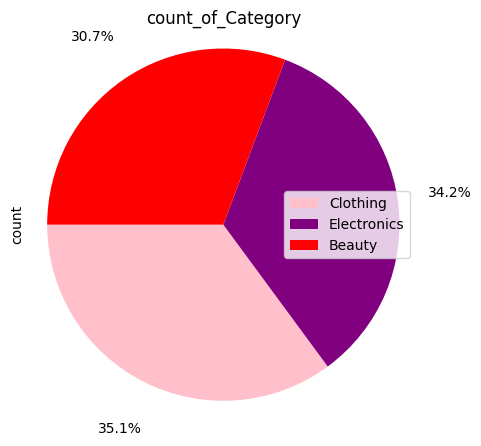

In [36]:
exp = [0,0,0]
color = ["pink", "purple", "red"]
cat.plot(kind= "pie", figsize = (5,5), autopct = "%1.1f%%", shadow = False, startangle = 180, 
         explode = exp, labels = None, pctdistance = 1.3, colors = color)

plt.title("count_of_Category")
plt.axis("equal")
plt.legend(labels = cat.index)
plt.show()          

In [76]:
# quantity sold by product category
qua_c = retail_data.groupby("Product Category")["Quantity"].sum()
qua_c

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

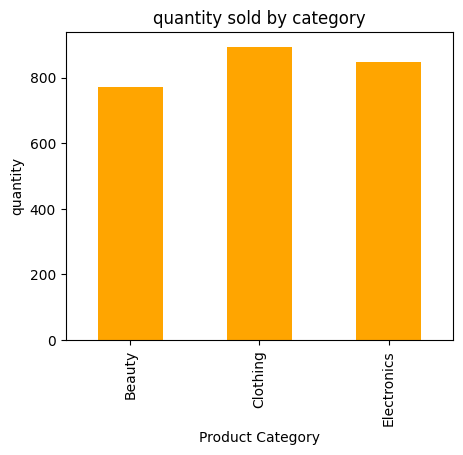

In [80]:
qua_c.plot(kind = "bar", figsize = (5,4), color = "orange")
plt.title("quantity sold by category")
plt.ylabel("quantity")
plt.show()

In [5]:
# total sales by product category
sales_c = retail_data.groupby("Product Category")["Total Amount"].sum()
sales_c

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

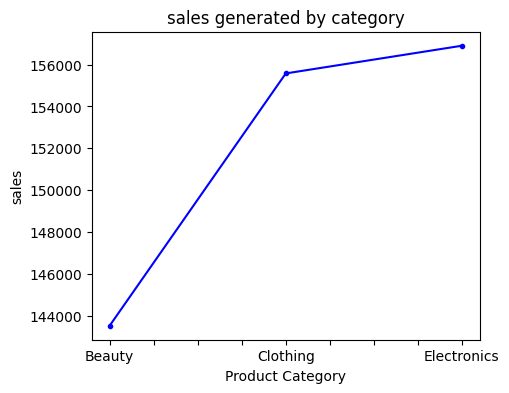

In [6]:
sales_c.plot(kind = "line", figsize = (5,4), color = "blue", marker = ".")
plt.title("sales generated by category")
plt.ylabel("sales")
plt.show()

# Time series Analysis

In [15]:
# changing the data type of date column
retail_data["Date"] = pd.to_datetime(retail_data["Date"])
retail_data["Date"]

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [16]:
timc = retail_data["Date"].value_counts()
timc

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28     1
Name: count, Length: 345, dtype: int64

In [17]:
# sales over time
time_sales = retail_data.groupby("Date")["Total Amount"].sum()
time_sales

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

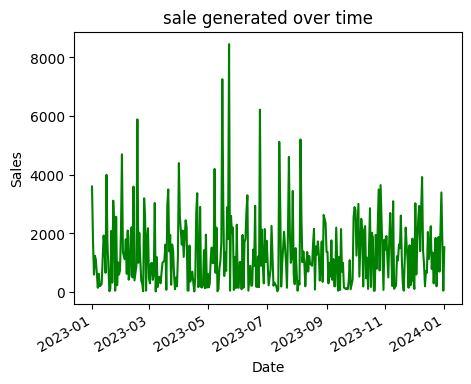

In [18]:
time_sales.plot(kind = "line", figsize = (5,4), color = "green")
plt.title("sale generated over time")
plt.ylabel("Sales")
plt.show()

# Insights:-

1. The data indicates that female buyers not only outnumber male buyers but also generate higher sales. This suggests that marketing strategies targeting female customers could be highly effective in driving sales.
2. The majority of buyers fall into the age group above 45, and they contribute the most to overall sales. This trend highlights the purchasing power and preferences of older consumers. Tailoring product offerings and marketing messages to appeal to this age group could enhance engagement and sales.
3. Electronics products drive the highest revenue, followed by clothing. This could indicate that customers are inclined towards high-value items such as electronics, but clothing products, with their relatively higher quantity sold, are also crucial to overall sales.
4. The highest sales were observed between May and June 2023. This could be due to seasonal shopping patterns, holiday sales, or promotional campaigns. Capitalizing on these months by running targeted promotions or exclusive deals during this period could help maximize sales in the future.